### Note ###
This notebook is used for data exploration and the processing of MAXAR satellite raw images.

In [1]:
import fiona
from fiona import crs
import rasterio
from rasterio.windows import from_bounds
import rasterio.merge
from osgeo import gdal
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from affine import Affine
import re

### Microsoft labels ###

In [11]:
word = '2023-02-07'
word2 = '2023-02-09'
word3 = '3154100'
with open('maxar-file-list.txt', 'r') as fp:
    # read all lines in a list
    lines = fp.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(word) == -1 and line.find(word2) == -1 and line.find(word3) != -1:
#             print('Line No',lines.index(line))
            print(line)

In [10]:
building_list = []
with fiona.open('islahiye_osm_damage_2_7_2023.gpkg') as layer:
# with fiona.open('marash_msft_damage_2_9_2023.gpkg') as layer:
    for feature in layer:
        building_list.append(feature)

In [11]:
building_list[5]

{'type': 'Feature',
 'id': '6',
 'properties': OrderedDict([('dmg', 1.9),
              ('area_2', 1524.2510583465348),
              ('damaged', 0)]),
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[(289844.4355133289, 4101323.5315561765),
     (289821.2166125188, 4101420.3926214576),
     (289848.13206617895, 4101426.785074384),
     (289871.36014090077, 4101329.923873651),
     (289860.8185942754, 4101327.4211496105),
     (289844.4355133289, 4101323.5315561765)]]]}}

In [13]:
dmg = []
damage = []
for i in building_list:
    dmg.append(i['properties']['dmg'])
    damage.append(i['properties']['damaged'])

print('There are ',sum(damage),' damaged buildings,')
print('and ',len(damage) - sum(damage), ' undamaged buildings')
print('in a total of ', len(damage), ' buildings.')

There are  328  damaged buildings,
and  12887  undamaged buildings
in a total of  13215  buildings.


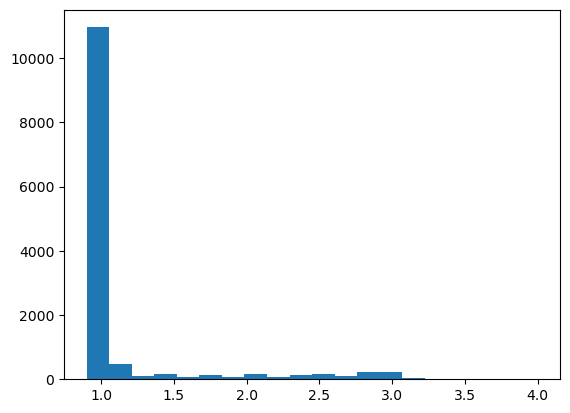

In [14]:
plt.hist(dmg,bins=20);

In [15]:
np.mean(dmg)

1.1814680287552024

In [11]:
to_extract = [i for i in range(len(dmg)) if dmg[i] > 0]
damage_np = np.array(damage)
damage_np[to_extract]
len(damage_np[to_extract])

3005

In [67]:
list_coords = []
for i in building_list:
    list_coords.append(i['geometry']['coordinates'])
print([x for x in list_coords if len(x) > 1])

[[[[(292616.04877113446, 4111745.8202088913), (292608.52161046234, 4111741.9529187046), (292605.64504026156, 4111747.8859923156), (292612.78085742967, 4111752.107097255), (292616.04877113446, 4111745.8202088913)]], [[(292601.348851305, 4111759.3498946964), (292611.4387850601, 4111765.4856996113), (292617.6009711401, 4111755.4303515432), (292605.4536760696, 4111748.057243851), (292603.05214548274, 4111751.980122527), (292605.10061537346, 4111753.2176357396), (292601.348851305, 4111759.3498946964)]]], [[[(288596.2956262372, 4099458.392299386), (288584.4145328088, 4099464.9956182623), (288591.74506946676, 4099461.5593009302), (288593.33333409275, 4099464.906012403), (288596.6799511074, 4099463.332105555), (288596.2956262372, 4099458.392299386)]], [[(288597.4103863255, 4099472.7205388197), (288597.2545387361, 4099470.717397875), (288596.6111136621, 4099471.019553855), (288597.4103863255, 4099472.7205388197)]]]]


### xBD labels ###

In [2]:
# Data dir
data_dir = "xBD_Dataset\\xView2_baseline\\geotiffs\\mexico_hold"
fp = os.path.join(data_dir, "mexico-earthquake_00000014_post_disaster.tif")

# Open the file:
raster = rasterio.open(fp)

# Check type of the variable 'raster'
type(raster)

rasterio.io.DatasetReader

In [3]:
raster.bounds

BoundingBox(left=-99.21445245859894, bottom=19.313433437889817, right=-99.20985007215074, top=19.31803582433801)

In [9]:
rxmin,rymin,rxmax,rymax = raster.bounds
rymax

19.31803582433801

In [70]:
# Read all bands
array = raster.read()

# Calculate statistics for each band
stats = []
for band in array:
    stats.append({
        'min': band.min(),
        'mean': band.mean(),
        'median': np.median(band),
        'max': band.max()})

# Show stats for each channel
stats

[{'min': 4, 'mean': 97.78862190246582, 'median': 89.0, 'max': 255},
 {'min': 5, 'mean': 93.34456157684326, 'median': 88.0, 'max': 255},
 {'min': 3, 'mean': 74.1468858718872, 'median': 68.0, 'max': 255}]

In [237]:
for filename in os.listdir('socal/'):
    test = pd.read_json('socal/'+filename)['features']['lng_lat']
    df = pd.json_normalize(test)
    if (df.shape[0] > 20 and sum(df['properties.subtype']=='destroyed')>10):
        print(filename)


socal-fire_00000082_post_disaster.json
socal-fire_00000114_post_disaster.json
socal-fire_00000253_post_disaster.json
socal-fire_00000268_post_disaster.json
socal-fire_00000348_post_disaster.json
socal-fire_00000360_post_disaster.json
socal-fire_00000387_post_disaster.json
socal-fire_00000408_post_disaster.json
socal-fire_00000494_post_disaster.json
socal-fire_00000501_post_disaster.json
socal-fire_00000525_post_disaster.json
socal-fire_00000573_post_disaster.json
socal-fire_00000631_post_disaster.json
socal-fire_00000657_post_disaster.json
socal-fire_00000662_post_disaster.json
socal-fire_00000663_post_disaster.json
socal-fire_00000679_post_disaster.json
socal-fire_00000805_post_disaster.json
socal-fire_00000817_post_disaster.json
socal-fire_00000821_post_disaster.json
socal-fire_00000862_post_disaster.json
socal-fire_00000886_post_disaster.json
socal-fire_00000913_post_disaster.json
socal-fire_00000962_post_disaster.json
socal-fire_00000987_post_disaster.json
socal-fire_00001000_post_

In [58]:
test = pd.read_json('socal/socal-fire_00001268_post_disaster.json')['features']['xy']
df = pd.json_normalize(test)
df

,wkt,properties.feature_type,properties.subtype,properties.uid
0,"POLYGON ((87.33036420713326 220.5026577770713,...",building,destroyed,a1f35493-6c07-474a-9de9-3917aca471dd
1,"POLYGON ((190.1643463558908 284.4835602812355,...",building,destroyed,fb421ec1-2b69-4d9c-a4d3-2f42cb0d6e52
2,"POLYGON ((247.1707234124513 296.7856273255641,...",building,destroyed,2ff1eeb7-bede-452d-9809-fa5562eac0b8
3,"POLYGON ((274.915601020236 311.1507083816043, ...",building,destroyed,cabe020e-c406-4b8c-9468-8b4349176b29
4,"POLYGON ((350.1014731899117 395.0397300055849,...",building,no-damage,9004f1e5-a712-4915-9815-b3171a1571cb
...,...,...,...,...
61,"POLYGON ((116.4813064597967 340.0252397234382,...",building,destroyed,2f70c21f-2358-4b85-969d-2ea7a939fcc6
62,"POLYGON ((33.28454401000153 332.0763577915762,...",building,no-damage,236aec4a-d7ca-40a5-a4c3-91875939371a
63,"POLYGON ((162.9288736083031 177.8199807578942,...",building,destroyed,24a9745f-353c-4792-8f97-c159437e0cdd
64,"POLYGON ((1000.306627752116 825.5726570999715,...",building,no-damage,fb973ad3-74bd-4576-9dff-48661bd11306


In [53]:
pd.read_json('socal/socal-fire_00001268_post_disaster.json')

In [59]:
df.to_csv('example.csv')

In [11]:
row = df.iloc[0,:]
# print(row['wkt'])
# two groups enclosed in separate ( and ) bracket
result = re.findall(r"(\-?\d+\.\d+)\s(\-?\d+\.\d+)", row['wkt'])

ymax = 0
ymin = 0
xmax = 0
xmin = 0
xvals = []
yvals = []
for i in result:
    xvals.append(float(i[0]))
    yvals.append(float(i[1]))

ymax = max(yvals) + 0.00001
ymin = min(yvals) - 0.00001
xmax = max(xvals) + 0.00001
xmin = min(xvals) - 0.00001

In [12]:
# geoms = [{'type': 'Polygon', 'coordinates': [[(250204.0, 141868.0), (250942.0, 141868.0), (250942.0, 141208.0), (250204.0, 141208.0), (250204.0, 141868.0)]]}]
# # load the raster, mask it by the polygon and crop it
# with rasterio.open("test.tif") as src:
#     out_image, out_transform = mask(src, geoms, crop=True)
# out_meta = src.meta.copy()

# # save the resulting raster  
# out_meta.update({"driver": "GTiff",
#     "height": out_image.shape[1],
#     "width": out_image.shape[2],
# "transform": out_transform})

# with rasterio.open("masked.tif", "w", **out_meta) as dest:
#     dest.write(out_image)

In [13]:
def window_from_extent(xmin, xmax, ymin, ymax, aff):
    col_start, row_start = ~aff * (xmin, ymax)
    col_stop, row_stop = ~aff * (xmax, ymin)
    return ((int(row_start), int(row_stop)), (int(col_start), int(col_stop)))

with rasterio.open('socal/socal-fire_00001268_post_disaster.tif') as src:
    aff = src.transform
    meta = src.meta.copy()
    window = window_from_extent(xmin, xmax, ymin, ymax, aff)
    # Read croped array
    arr1 = src.read(1, window=window)
    arr2 = src.read(2, window=window)
    arr3 = src.read(3, window=window)
    # Update dataset metadata (if you need it)
#     meta.update(height = window[0][1] - window[0][0],
#                 width = window[1][1] - window[1][0],
#                 affine = src.window_transform(window))
#     meta.pop('transform', None

rgb = np.dstack((arr1,arr2,arr3)).astype(np.uint8)
rgb.shape

RasterioIOError: socal/socal-fire_00001268_post_disaster.tif: No such file or directory

In [14]:
# Use PIL to create an image from the new array of pixels
new_image = Image.fromarray(rgb)
new_image.save('./temp/'+'new.png')

NameError: name 'rgb' is not defined

### Cell to extract buildings using coordinates###

In [64]:
test = pd.read_json('socal/socal-fire_00001268_post_disaster.json')['features']['lng_lat']
df = pd.json_normalize(test)
df
for j in range(df.shape[0]):
    row = df.iloc[j,:]
    uid = df.loc[j,'properties.uid']
    # print(row['wkt'])
    # two groups enclosed in separate ( and ) bracket
    result = re.findall(r"(\-?\d+\.\d+)\s(\-?\d+\.\d+)", row['wkt'])
    
    ymax = 0
    ymin = 0
    xmax = 0
    xmin = 0
    xvals = []
    yvals = []
    for i in result:
        xvals.append(float(i[0]))
        yvals.append(float(i[1]))

    ymax = max(yvals) + 0.0001
    ymin = min(yvals) - 0.0001
    xmax = max(xvals) + 0.0001
    xmin = min(xvals) - 0.0001
    
    with rasterio.open('socal-fire_00001268_pre_disaster.tif') as src:
        aff = src.transform
#         meta = src.meta.copy()
        rxmin,rymin,rxmax,rymax = src.bounds
        ymax = min(ymax,rymax)
        ymin = max(ymin,rymin)
        xmax = min(xmax,rxmax)
        xmin = max(xmin,rxmin)
        try:
            window = from_bounds(xmin, ymin, xmax, ymax, aff)
        except:
            continue
#         Read croped array
        print(window)
        arr1 = src.read(1, window=window)
        arr2 = src.read(2, window=window)
        arr3 = src.read(3, window=window)
#         Update dataset metadata (if you need it)
#         meta.update(height = window[0][1] - window[0][0],
#                     width = window[1][1] - window[1][0],
#                     affine = src.window_transform(window))
#         meta.pop('transform', None

    rgb = np.dstack((arr1,arr2,arr3)).astype(np.uint8)
    print(rgb.shape)
    new_image = Image.fromarray(rgb)
    new_image.save('./temp1/' + uid + '.png')

Window(col_off=76.96967252716422, row_off=147.14532839134336, width=118.51727210730314, height=103.08053905889392)
(103, 118, 3)
Window(col_off=164.38121513277292, row_off=225.49462271574885, width=117.84565267711878, height=102.69234538823366)
(102, 117, 3)
Window(col_off=251.5690252929926, row_off=244.2037111259997, width=79.44165228307247, height=70.19163086358458)
(70, 79, 3)
Window(col_off=274.0431630462408, row_off=269.96738676168025, width=92.37033214792609, height=88.52298608515412)
(88, 92, 3)
Window(col_off=364.9425850510597, row_off=332.81259485613555, width=129.35421590134501, height=118.07208265736699)
(118, 129, 3)
Window(col_off=356.35157638415694, row_off=406.4897752767429, width=98.81081383302808, height=114.52177909016609)
(114, 98, 3)
Window(col_off=604.1453149169683, row_off=376.94732451159507, width=125.54751097038388, height=110.34293636865914)
(110, 125, 3)
Window(col_off=726.3725012019277, row_off=387.98066946677864, width=120.37537128478289, height=75.943532548

### Cell to extract buildings using xy values ###

In [68]:
test = pd.read_json('socal/socal-fire_00001268_post_disaster.json')['features']['xy']
df = pd.json_normalize(test)
df
for j in range(df.shape[0]):
    row = df.iloc[j,:]
    uid = df.loc[j,'properties.uid']
    # print(row['wkt'])
    # two groups enclosed in separate ( and ) bracket
    result = re.findall(r"(\d+\.\d+)\s(\d+\.\d+)", row['wkt'])
    
    ymax = 0
    ymin = 0
    xmax = 0
    xmin = 0
    xvals = []
    yvals = []
    for i in result:
        xvals.append(float(i[0]))
        yvals.append(float(i[1]))

    ymax = max(yvals) + 10
    ymin = min(yvals) - 10
    xmax = max(xvals) + 10
    xmin = min(xvals) - 10
    
    with rasterio.open('socal-fire_00001268_post_disaster.tif') as src:
        aff = src.transform
#         meta = src.meta.copy()
        rxmin,rymin,rxmax,rymax = (0,0,src.shape[1],src.shape[0])
        ymax = min(ymax,rymax)
        ymin = max(ymin,rymin)
        xmax = min(xmax,rxmax)
        xmin = max(xmin,rxmin)
        
        window = window = ((int(ymin), int(ymax)), (int(xmin), int(xmax)))
#         Read croped array
        arr1 = src.read(1, window=window)
        arr2 = src.read(2, window=window)
        arr3 = src.read(3, window=window)

    rgb = np.dstack((arr1,arr2,arr3)).astype(np.uint8)
    print(rgb.shape)
    new_image = Image.fromarray(rgb)
    new_image.save('./temp/' + uid + '.png')

(86, 90, 3)
(86, 89, 3)
(50, 53, 3)
(69, 64, 3)
(103, 98, 3)
(98, 70, 3)
(95, 95, 3)
(56, 91, 3)
(59, 90, 3)
(72, 55, 3)
(36, 45, 3)
(95, 106, 3)
(87, 92, 3)
(45, 74, 3)
(85, 52, 3)
(94, 81, 3)
(79, 92, 3)
(70, 137, 3)
(95, 106, 3)
(48, 79, 3)
(63, 57, 3)
(61, 60, 3)
(81, 69, 3)
(53, 30, 3)
(69, 82, 3)
(108, 64, 3)
(78, 76, 3)
(72, 78, 3)
(60, 67, 3)
(139, 93, 3)
(83, 59, 3)
(50, 57, 3)
(56, 44, 3)
(38, 83, 3)
(26, 73, 3)
(42, 61, 3)
(58, 79, 3)
(43, 40, 3)
(82, 65, 3)
(42, 51, 3)
(52, 28, 3)
(47, 46, 3)
(42, 42, 3)
(39, 38, 3)
(41, 42, 3)
(31, 30, 3)
(34, 39, 3)
(34, 34, 3)
(37, 31, 3)
(43, 37, 3)
(28, 32, 3)
(34, 29, 3)
(34, 41, 3)
(27, 27, 3)
(41, 42, 3)
(40, 31, 3)
(34, 31, 3)
(36, 32, 3)
(39, 38, 3)
(37, 40, 3)
(39, 37, 3)
(35, 33, 3)
(31, 31, 3)
(38, 41, 3)
(50, 40, 3)
(61, 41, 3)


### Merge MAXAR Islahiye raster files ###

In [20]:
file_list = os.listdir('./turkey_maxar_0207/')
file_list = [file for file in file_list if '1040010082698700' in file and 'aux' not in file]
print(file_list)
file_list = [('./turkey_maxar_0207/' + file) for file in file_list]

['1040010082698700-visual (1).tif', '1040010082698700-visual (10).tif', '1040010082698700-visual (11).tif', '1040010082698700-visual (12).tif', '1040010082698700-visual (13).tif', '1040010082698700-visual (14).tif', '1040010082698700-visual (15).tif', '1040010082698700-visual (16).tif', '1040010082698700-visual (17).tif', '1040010082698700-visual (18).tif', '1040010082698700-visual (19).tif', '1040010082698700-visual (2).tif', '1040010082698700-visual (20).tif', '1040010082698700-visual (21).tif', '1040010082698700-visual (22).tif', '1040010082698700-visual (23).tif', '1040010082698700-visual (24).tif', '1040010082698700-visual (25).tif', '1040010082698700-visual (26).tif', '1040010082698700-visual (27).tif', '1040010082698700-visual (28).tif', '1040010082698700-visual (29).tif', '1040010082698700-visual (3).tif', '1040010082698700-visual (30).tif', '1040010082698700-visual (31).tif', '1040010082698700-visual (32).tif', '1040010082698700-visual (33).tif', '1040010082698700-visual (34).

In [7]:
file_list = ['10300100E19A4400/031133011011.tif','10300100E291D100/031133011011.tif']
dest, output_transform = rasterio.merge.merge(file_list)
with rasterio.open('10300100E19A4400/031133011011.tif') as src:
    out_meta = src.meta.copy()    
out_meta.update({"driver": "GTiff",
                 "height": dest.shape[1],
                 "width": dest.shape[2],
                 "transform": output_transform})
with rasterio.open("combined_1.tif", "w", **out_meta) as dest1:
    dest1.write(dest)

RasterioIOError: Read or write failed. IReadBlock failed at X offset 21, Y offset 0: TIFFReadEncodedTile() failed.

In [35]:
import subprocess
cmd = "gdal_merge.py -o turkey_maxar_0207_combined.tif"
subprocess.call((cmd.split() + file_list), shell=True)

0

In [21]:
vrt = None
vrt = gdal.BuildVRT('merged.vrt',file_list)
vrt_1 = gdal.Translate('merged_1.vrt',vrt)

In [22]:
import glob

files = glob.glob('islahiye_0207_building_crops/undamaged/*')
for f in files:
    os.remove(f)
files = glob.glob('islahiye_0207_building_crops/damaged/*')
for f in files:
    os.remove(f)

In [23]:
counter = 0
with rasterio.open('merged.vrt') as src:
    aff = src.transform
    # meta = src.meta.copy()
    rxmin, rymin, rxmax, rymax = src.bounds

    for bldg in building_list:
        coords = bldg['geometry']['coordinates'][0][0]
#         damage_type = bldg['properties']['damaged']
        damage_type = bldg['properties']['dmg'] > 2
  
        if len(coords) == 0:
            continue

        xvals = []
        yvals = []
        for coord in coords:
            xvals.append(coord[0])
            yvals.append(coord[1])

        ymax = max(yvals) + 5
        ymin = min(yvals) - 5
        xmax = max(xvals) + 5
        xmin = min(xvals) - 5
        
    #     # discard this building if too small for human to make reliable prediction
    #     if ((ymax - ymin) < 40 or (xmax - xmin) < 40):
    #         continue
        ymax = min(ymax,rymax)
        ymin = max(ymin,rymin)
        xmax = min(xmax,rxmax)
        xmin = max(xmin,rxmin)
        window = from_bounds(xmin, ymin, xmax, ymax, aff)
        
#         try:
#             window = from_bounds(xmin, ymin, xmax, ymax, aff)
#         except:
#             continue

        arr1 = src.read(1, window=window)
        arr2 = src.read(2, window=window)
        arr3 = src.read(3, window=window)
        if arr1.shape[0] < 30 or arr1.shape[1] < 30:
            continue
        # output image of cropped building
        rgb = np.dstack((arr1,arr2,arr3)).astype(np.uint8)
        stddev = np.std(rgb)
        # remove images of clouds and dark shadows
        if stddev < 30:
            continue
        new_image = Image.fromarray(rgb)

        if damage_type == 0:
            damage_status = 'undamaged'
        else:
            damage_status = 'damaged'

        counter += 1
        save_path = './islahiye_0207_building_crops/' + damage_status + '/'
        save_name = 'islahiye' + '-' + str(counter) + '-' + damage_status + '.png'
        new_image.save(save_path + save_name)
vrt = None

In [149]:
testpic = Image.open('islahiye_0207_building_crops/undamaged/islahiye-1049-undamaged.png')
testpicarray = np.array(testpic)
np.std(testpicarray)

73.63139168293044

### Merge MAXAR Marash raster files ###

In [6]:
file_list = os.listdir('./10300100E19A4400/')
file_list = [file for file in file_list if 'aux' not in file]
file_list = [('./10300100E19A4400/' + file) for file in file_list]

file_list_2 = os.listdir('./10300100E291D100/')
file_list_2 = [file for file in file_list_2 if 'aux' not in file]
file_list_2 = [('./10300100E291D100/' + file) for file in file_list_2]

file_list = file_list + file_list_2
print(file_list)

['./10300100E19A4400/031131233221.tif', './10300100E19A4400/031131233222.tif', './10300100E19A4400/031131233223.tif', './10300100E19A4400/031131233230.tif', './10300100E19A4400/031131233231.tif', './10300100E19A4400/031131233232.tif', './10300100E19A4400/031131233233.tif', './10300100E19A4400/031133011000.tif', './10300100E19A4400/031133011001.tif', './10300100E19A4400/031133011010.tif', './10300100E19A4400/031133011011.tif', './10300100E291D100/031131233231.tif', './10300100E291D100/031131233233.tif', './10300100E291D100/031131233320.tif', './10300100E291D100/031131233321.tif', './10300100E291D100/031131233322.tif', './10300100E291D100/031131233323.tif', './10300100E291D100/031133011011.tif', './10300100E291D100/031133011100.tif', './10300100E291D100/031133011101.tif']


In [7]:
vrt = None
vrt = gdal.BuildVRT('merged.vrt',file_list,srcNodata=0)
# vrt_1 = gdal.Translate('merged_1.vrt',vrt,noData=0)

In [8]:
import glob

files = glob.glob('marash_building_crops/undamaged/*')
for f in files:
    os.remove(f)
files = glob.glob('marash_building_crops/damaged/*')
for f in files:
    os.remove(f)

In [9]:
counter = 0
with rasterio.open('merged.vrt') as src:
    aff = src.transform
    # meta = src.meta.copy()
    rxmin, rymin, rxmax, rymax = src.bounds

    for bldg in building_list:
        coords = bldg['geometry']['coordinates'][0]
        damage_type = bldg['properties']['damaged']
#         damage_type = bldg['properties']['dmg'] > 2
  
        if len(coords) == 0:
            continue

        xvals = []
        yvals = []
        for coord in coords:
            xvals.append(coord[0])
            yvals.append(coord[1])

        ymax = max(yvals) + 5
        ymin = min(yvals) - 5
        xmax = max(xvals) + 5
        xmin = min(xvals) - 5
        
    #     # discard this building if too small for human to make reliable prediction
    #     if ((ymax - ymin) < 40 or (xmax - xmin) < 40):
    #         continue
        ymax = min(ymax,rymax)
        ymin = max(ymin,rymin)
        xmax = min(xmax,rxmax)
        xmin = max(xmin,rxmin)
        window = from_bounds(xmin, ymin, xmax, ymax, aff)
        
#         try:
#             window = from_bounds(xmin, ymin, xmax, ymax, aff)
#         except:
#             continue

        arr1 = src.read(1, window=window)
        arr2 = src.read(2, window=window)
        arr3 = src.read(3, window=window)
        if arr1.shape[0] < 30 or arr1.shape[1] < 30:
            continue
        # output image of cropped building
        rgb = np.dstack((arr1,arr2,arr3)).astype(np.uint8)
        stddev = np.std(rgb)
#         # remove images of clouds and dark shadows
#         if stddev < 30:
#             continue
        new_image = Image.fromarray(rgb)

        if damage_type == 0:
            damage_status = 'undamaged'
        else:
            damage_status = 'damaged'

        counter += 1
        save_path = './marash_building_crops/' + damage_status + '/'
        save_name = 'marash' + '-' + str(counter) + '-' + damage_status + '.png'
        new_image.save(save_path + save_name)
vrt = None